In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df = pd.read_csv('drive/MyDrive/online_shoppers_intention.csv', delimiter = ',', encoding ='UTF-8')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#check missing value
print(df.isnull().sum())

# df['Month'] = df['Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
# df['VisitorType'] = df['VisitorType'].map({'Returning_Visitor': 0, 'New_Visitor': 1})
df.head()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Separate the cleaned data back into X and y
X = df.drop(['Revenue'], axis=1) # Features
y = df['Revenue'] # Label

X.shape, y.shape

from sklearn.preprocessing import LabelEncoder
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool':
        lb = LabelEncoder()
        X_enc[col] = lb.fit_transform(X[col].values)
        y_enc = lb.fit_transform(df['Revenue'])


X_enc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1


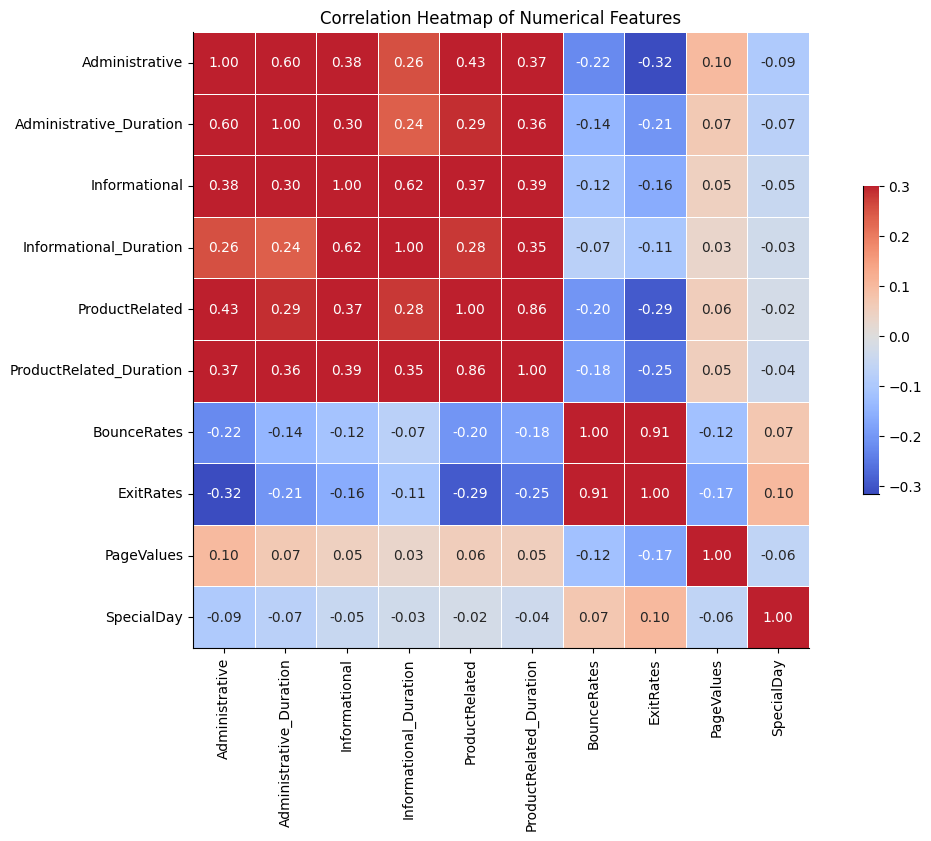

In [ ]:
# Calculate the correlation matrix for numerical columns
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
corr = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
g = sns.heatmap(corr, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Axes: title={'center': 'Weekend'}, xlabel='Weekend'>

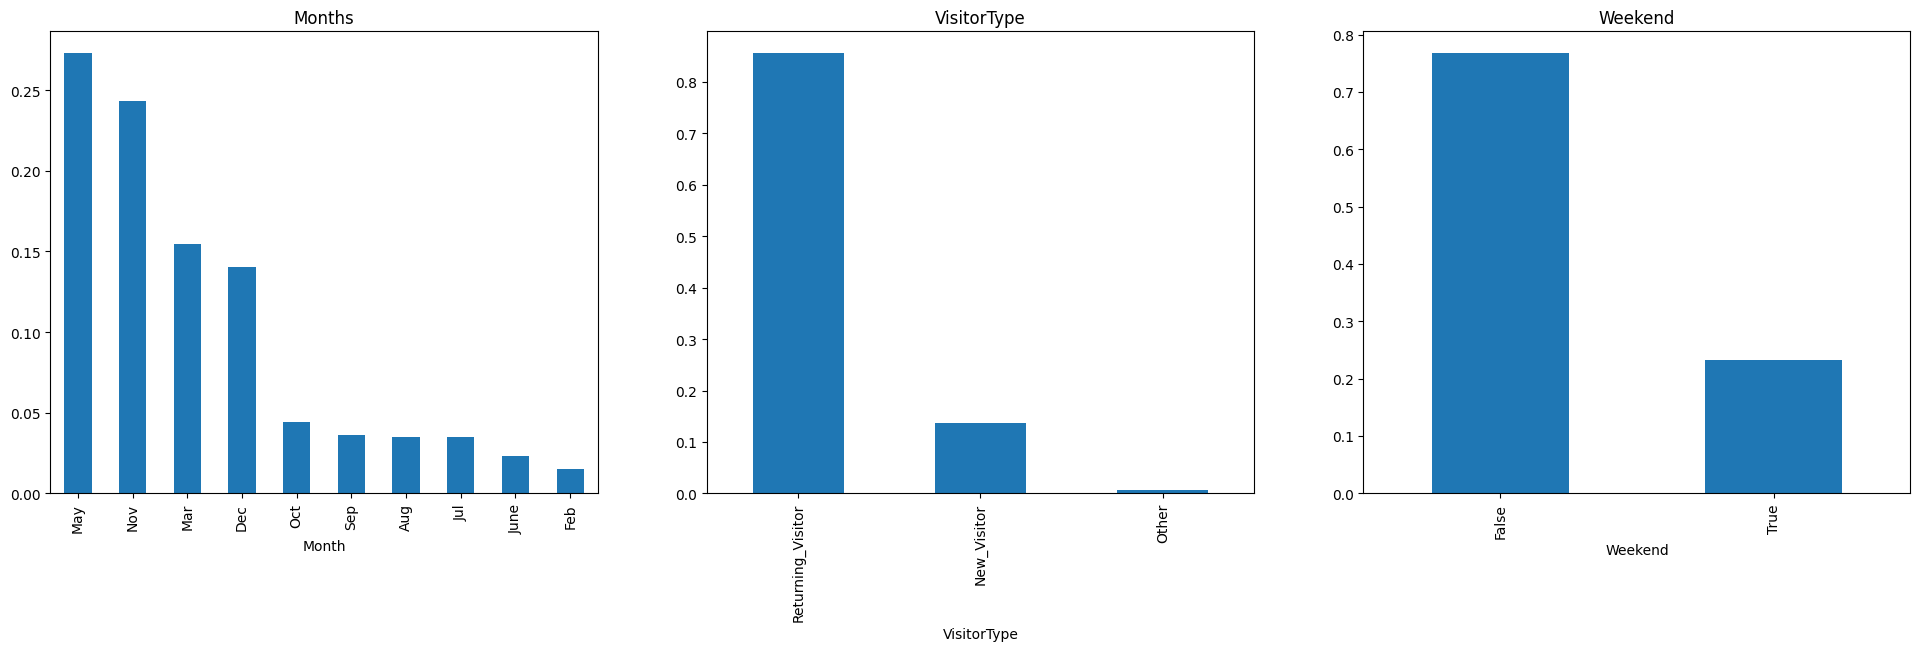

In [ ]:
# Independed variable [ordinal]
plt.figure(1)
plt.subplot(131)
df['Month'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Months')

plt.subplot(132)
df['VisitorType'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'VisitorType')

plt.subplot(133)
df['Weekend'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Weekend')

<Axes: title={'center': 'TrafficType'}, xlabel='TrafficType'>

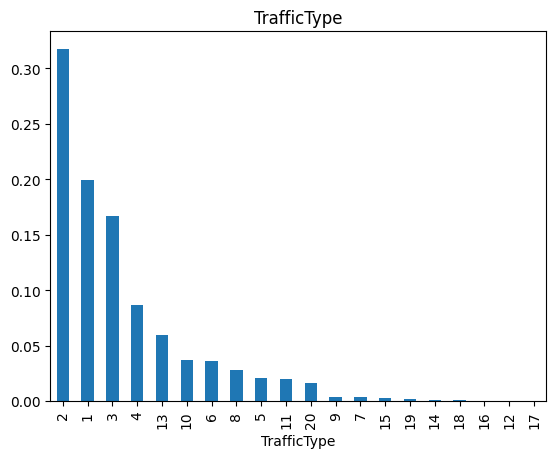

In [ ]:
df['TrafficType'].value_counts(normalize=True).plot.bar(title= 'TrafficType')

<Axes: xlabel='Month'>

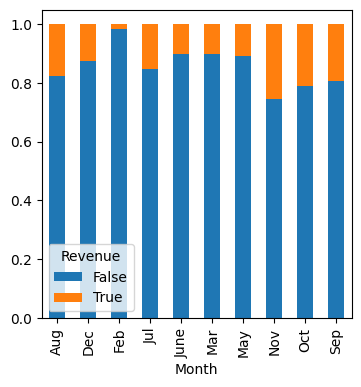

In [ ]:
revenue=pd.crosstab(df['Month'],df['Revenue'])
revenue.div(revenue.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

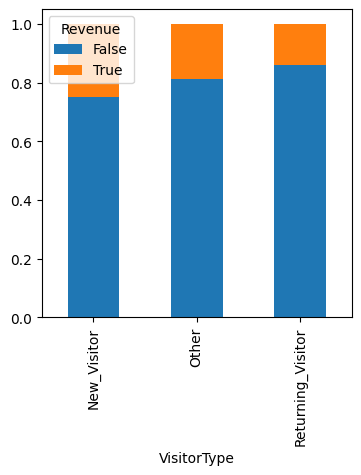

In [ ]:
visitortype=pd.crosstab(df['VisitorType'],df['Revenue'])
visitortype.div(visitortype.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 1908
Before OverSampling, counts of label '0': 10422 

After OverSampling, the shape of train_X: (20844, 17)
After OverSampling, the shape of train_y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size =0.2, random_state = 40)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16675, 17), (16675,), (4169, 17), (4169,))

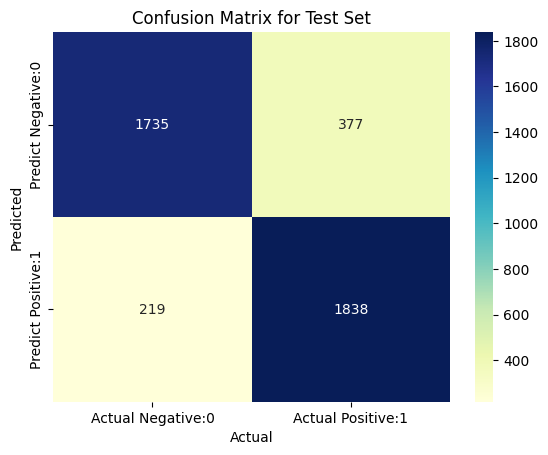

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

# training a knn model
model.fit(x_train,y_train)
kn_train = model.score(x_train, y_train)
kn_test = model.score(x_test, y_test)

# Predict the labels for the test set
y_test_pred = model.predict(x_test)

# Generate the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

# Create a DataFrame for the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'],
                                 index=['Predict Negative:0', 'Predict Positive:1'])

# Plot the confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.84767616 0.85517241 0.83238381 0.86056972 0.84437781]
Average cross-validation score: 0.8480


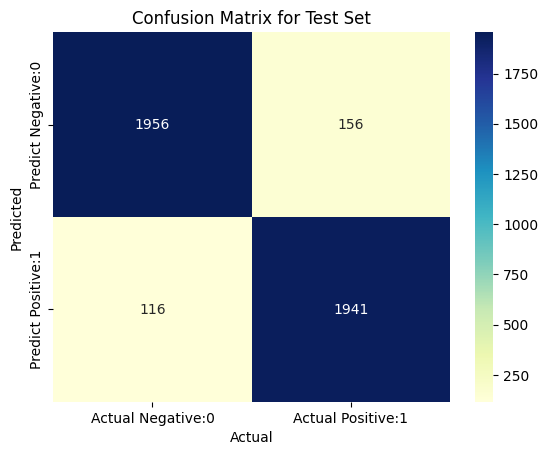

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02)
xgb.fit(x_train, y_train)
preds_valid = xgb.predict(x_test)
xgb_train =  xgb.score(x_train, y_train)
xgb_test = xgb.score(x_test, y_test)

# Generate the confusion matrix for the test set
cm = confusion_matrix(y_test, preds_valid)

# Create a DataFrame for the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'],
                                 index=['Predict Negative:0', 'Predict Positive:1'])

# Plot the confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.92563718 0.93343328 0.92413793 0.93913043 0.92593703]
Average cross-validation score: 0.9297


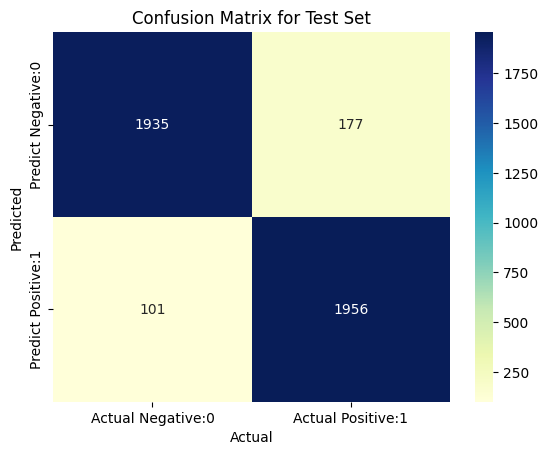

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100)
clf.fit(x_train, y_train)
rf_train = clf.score(x_train, y_train)
rf_test = clf.score(x_test, y_test)

# Predict the labels for the test set
y_test_pred = clf.predict(x_test)

# Generate the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

# Create a DataFrame for the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'],
                                 index=['Predict Negative:0', 'Predict Positive:1'])

# Plot the confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.92143928 0.93163418 0.91994003 0.93193403 0.91874063]
Average cross-validation score: 0.9247


In [ ]:
data = {'Algorithms':['XGBClassifier', 'RandomForestClassifier', 'K Nearest Neighbor'],
        'Train':[xgb_train, rf_train, kn_train],
       'Test':[xgb_test, rf_test, kn_test]}

# Calling DataFrame constructor
a = pd.DataFrame(data)

print(a)

               Algorithms     Train      Test
0           XGBClassifier  0.987646  0.934757
1  RandomForestClassifier  1.000000  0.933317
2      K Nearest Neighbor  0.892414  0.857040
